In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# library written for this exercise providing additional functions for assignment submission, and others
import utils 

# define the submission/grader object for this exercise
grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

<h1> Instructions: Return the 5x5 identity matrix  </h1>
           <li>  In octave, we return values by defining which variables </li>
           <li>  represent the return values (at the top of the file)</li>
           <li>  and then set them accordingly. </li>

In [2]:
def warmUpExercise():
    identity_5 = np.identity(5)
    display(identity_5)
    return identity_5


- ======================= Part 2: Plotting =======================


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Data/ex1data1.txt',sep=',',header=None,names=["X","y"])
data = pd.DataFrame(data)


In [4]:
display(data)

,X,y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [5]:
x= data["X"]
y= data["y"]

Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

<a id="section2"></a>
### 2.2 Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

#### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).


**Implementation Note:** We store each example as a row in the the $X$ matrix in Python `numpy`. To take into account the intercept term  $\theta_0$, we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
</div>


#### 2.2.2 Implementation

We have already set up the data for linear regression. In the following cell, we add another dimension to our data to accommodate the $ \theta_0 $ intercept term. Do NOT execute this cell more than once.

In [6]:
data.isnull().sum() # No missing data

X    0
y    0
dtype: int64

In [7]:
data.describe()

,X,y
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [8]:
X = data["X"].values

y = data["y"].values

m= len(y)


# Gradient Descent Algorithm

- Repeat until convergence is reached
$$ \theta_i := \theta_{old} - \alpha \frac{dy}{d\theta} L(\theta_i,Y)$$

In [9]:
theta = np.zeros([2,1])
iterations = 1500
alpha = 0.01

def PrepareX(X):
    X = X[:,np.newaxis]
    ones = np.ones((m,1))
    X = np.hstack((ones, X)) # adding the intercept term
    return X

    
def PrepareY(y):
    return y[:,np.newaxis]


In [10]:
theta

array([[0.],
       [0.]])

In [11]:
np.zeros(2)

array([0., 0.])

In [12]:
train_X=PrepareX(X)
train_Y=PrepareY(y)


In [13]:
# implementing the gradient descent algorithm

def computeCost(X, y, theta):
    temp = np.dot(X, theta) - y
    J= np.sum(np.power(temp, 2)) / (2*m)
    
    return J


In [14]:
X = np.stack([np.ones(m), X], axis=1)

In [15]:
J = computeCost(train_X,y, theta=np.zeros(2))
J

32.072733877455676

In [16]:
np.array([[-1],[2]])

array([[-1],
       [ 2]])

In [17]:
J = computeCost(train_X, train_Y, theta=np.zeros([2,1]))


print('With theta = [0, 0] Cost computed ', J)
print('Expected cost value (approximately) 32.07\n')

# further testing of the cost function
J = computeCost(train_X, train_Y, theta=np.array([[-1],[2]]))


print('With theta = [-1, 2] Cost computed ' , J)
print('Expected cost value (approximately) 54.24')


With theta = [0, 0] Cost computed  32.072733877455676
Expected cost value (approximately) 32.07

With theta = [-1, 2] Cost computed  54.24245508201238
Expected cost value (approximately) 54.24


In [33]:
grader[2] = computeCost
grader.grade()


Submitting Solutions | Programming Exercise linear-regression



array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Normal Equations |  10 /  10 | Nice work!
                           Warm up exercise |   0 /  40 | Your answer is incorrect.
          Computing Cost (for one variable) |   0 /  50 | Your answer is incorrect.
        Gradient Descent (for one variable) |   0 /   0 | Your answer is incorrect.
                      Feature Normalization |   0 /   0 | Your answer is incorrect.
    Computing Cost (for multiple variables) |   0 /   0 | Your answer is incorrect.
  Gradient Descent (for multiple variables) |   0 /   0 | Your answer is incorrect.
                                  --------------------------------
                                            |  10 / 100 |  



In [19]:
Original_cost = computeCost(train_X, train_Y, theta)
print(Original_cost)

32.072733877455676


In [20]:
computeCost

<function __main__.computeCost(X, y, theta)>

In [21]:
# Grading of question 1 
grader = utils.Grader()

grader[1] = warmUpExercise
grader.grade()


Submitting Solutions | Programming Exercise linear-regression



array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Invalid email or token. You used an invalid email or your token may have expired. Please make sure you have entered all fields correctly. Try generating a new token if the issue still persists.


In [22]:



def hypothesis(X,theta):
    return np.dot(X, theta)


# epoch == one forward pass and one backward pass of all the training examples
def LinReg_gradientDescent(X,y,theta,alpha,epoch):
    for _ in range(epoch):
        temp = hypothesis(X,theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
        #Draw graph
        # if( _  % 300 == 0):
        #     DrawGraph(train_X,train_Y,theta)

    return theta



def DrawGraph(train_X,train_Y,theta):
    plt.scatter(train_X[:,1], train_Y)
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.plot(train_X[:,1], np.dot(train_X, theta),color="#FFDD44")
    plt.show()




theta = LinReg_gradientDescent(train_X,train_Y, theta, alpha, iterations)
print(theta)



[[-3.63029144]
 [ 1.16636235]]


In [23]:

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of ',predict1*10000)

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of ',predict2*10000)

For population = 35,000, we predict a profit of  [4519.7678677]
For population = 70,000, we predict a profit of  [45342.45012945]


In [24]:
grader[2] = computeCost
grader.grade()



Submitting Solutions | Programming Exercise linear-regression



array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Normal Equations |  10 /  10 | Nice work!
                           Warm up exercise |   0 /  40 | Your answer is incorrect.
          Computing Cost (for one variable) |   0 /  50 | Your answer is incorrect.
        Gradient Descent (for one variable) |   0 /   0 | Your answer is incorrect.
                      Feature Normalization |   0 /   0 | Your answer is incorrect.
    Computing Cost (for multiple variables) |   0 /   0 | Your answer is incorrect.
  Gradient Descent (for multiple variables) |   0 /   0 | Your answer is incorrect.
                                  --------------------------------
                                            |  10 / 100 |  



In [25]:
J = computeCost(train_X, train_Y, theta)
print(J)



4.483388256587726


# Calculating theta and cost

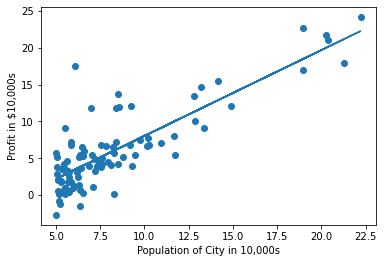

In [26]:
plt.scatter(train_X[:,1], train_Y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(train_X[:,1], np.dot(train_X, theta))
plt.show()

# Linear Regression with multiple variables


In [27]:
data_2 = pd.read_csv('Data/ex1data2.txt', sep = ',', header = None,names=['size_feet^2','number_bedrooms','price_house'])


data_2 = pd.DataFrame(data_2)

X = data_2.iloc[:,0:2] # read first two columns into X
y = data_2.iloc[:,2] # read the third column into y

m = len(y) # no. of training samples

data_2


,size_feet^2,number_bedrooms,price_house
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


# Doing feature Normalization

- Substract the mean value of each feature from the data set 
- After subtracting the mean, additionally scale (divide) the feature values
by their respective "standard deviations."

In [28]:
X = ( X - X.mean())/np.std(X)

In [29]:
ones = np.ones((m,1))
X = np.hstack((ones, X))
alpha = 0.01
num_iters = 400
theta = np.zeros((3,1))
y = y[:,np.newaxis]



/tmp/ipykernel_10257/2162591772.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:,np.newaxis]


In [30]:
def computeCostMulti(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)
J = computeCostMulti(X, y, theta)
print(J)

65591548106.45744


In [31]:
def gradientDescentMulti(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta




theta = gradientDescentMulti(X, y, theta, alpha, num_iters)
print(theta)


[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


In [32]:
J = computeCostMulti(X, y, theta)
print(J)

2105448288.6292474
